In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
digitset = keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=digitset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain=xtrain.reshape((60000,28,28,1))
xtest=xtest.reshape((10000,28,28,1))

In [ ]:
xtrainz=xtrain/255.0
xtestz=xtest/255.0

In [ ]:
xvalid,xtrain=xtrainz[:6000],xtrainz[6000:]
yvalid,ytrain=ytrain[:6000],ytrain[6000:]
xtest=xtestz

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
Trained_model=model.fit(xtrain,ytrain,epochs=60,batch_size=64,validation_data=(xvalid,yvalid))

Epoch 1/60
844/844 [==============================] - 39s 45ms/step - loss: 0.7835 - accuracy: 0.7927 - val_loss: 0.3034 - val_accuracy: 0.9085
Epoch 2/60
844/844 [==============================] - 35s 42ms/step - loss: 0.2724 - accuracy: 0.9199 - val_loss: 0.2186 - val_accuracy: 0.9385
Epoch 3/60
844/844 [==============================] - 37s 44ms/step - loss: 0.2151 - accuracy: 0.9352 - val_loss: 0.1787 - val_accuracy: 0.9498
Epoch 4/60
844/844 [==============================] - 36s 43ms/step - loss: 0.1787 - accuracy: 0.9468 - val_loss: 0.1537 - val_accuracy: 0.9562
Epoch 5/60
844/844 [==============================] - 37s 43ms/step - loss: 0.1527 - accuracy: 0.9546 - val_loss: 0.1359 - val_accuracy: 0.9605
Epoch 6/60
844/844 [==============================] - 49s 58ms/step - loss: 0.1332 - accuracy: 0.9601 - val_loss: 0.1188 - val_accuracy: 0.9652
Epoch 7/60
844/844 [==============================] - 37s 44ms/step - loss: 0.1171 - accuracy: 0.9654 - val_loss: 0.1202 - val_accuracy:

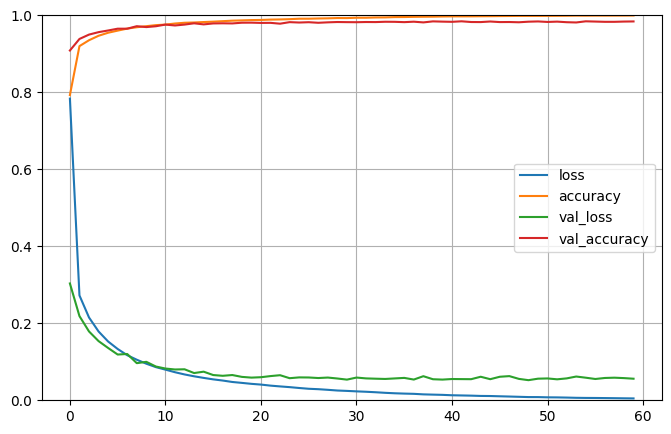

In [ ]:
import pandas as pd
pd.DataFrame(Trained_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
ev=model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 8ms/step - loss: 0.0562 - accuracy: 0.9835


#MODEL 2 (Filters=64)

In [ ]:
model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(200,activation="relu"))
model2.add(keras.layers.Dense(100,activation="relu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
Trained_model2=model2.fit(xtrain,ytrain,epochs=60,batch_size=64,validation_data=(xvalid,yvalid))

Epoch 1/60
844/844 [==============================] - 63s 74ms/step - loss: 0.6973 - accuracy: 0.8335 - val_loss: 0.3065 - val_accuracy: 0.9160
Epoch 2/60
844/844 [==============================] - 62s 73ms/step - loss: 0.2798 - accuracy: 0.9174 - val_loss: 0.2302 - val_accuracy: 0.9365
Epoch 3/60
844/844 [==============================] - 60s 71ms/step - loss: 0.2229 - accuracy: 0.9351 - val_loss: 0.1856 - val_accuracy: 0.9448
Epoch 4/60
844/844 [==============================] - 60s 71ms/step - loss: 0.1843 - accuracy: 0.9451 - val_loss: 0.1693 - val_accuracy: 0.9517
Epoch 5/60
844/844 [==============================] - 61s 72ms/step - loss: 0.1570 - accuracy: 0.9531 - val_loss: 0.1386 - val_accuracy: 0.9613
Epoch 6/60
844/844 [==============================] - 60s 71ms/step - loss: 0.1368 - accuracy: 0.9592 - val_loss: 0.1305 - val_accuracy: 0.9628
Epoch 7/60
844/844 [==============================] - 60s 71ms/step - loss: 0.1212 - accuracy: 0.9635 - val_loss: 0.1150 - val_accuracy:

In [ ]:
ev2=model2.evaluate(xtest,ytest)